# Summer Course Group 1
### Members of the group:
- Syahraini Revita Puri
- Fikry Idham Dwiyana (Group Leader)
- Abbas Ahmad
- Ananda Myzza Marhelio
- Indah Resti Fauzi
- Naeem Ur Rahman
- Imam Chalish Rafidhul Haque

# Assignment: Course 2B

## Import Library and Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Summer Course 2024/Tugas/Course-2B/orderdataset.csv', sep=';');
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


## Analysis the Dataset and Pre-proccess It

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


There is two things that caught our attention, the first one is there is **values missing** in `product_weight_gram` and an **error/mistaken format** for `purchase_date`.


## Data Cleaning

### Filled the missing values

In [5]:
# Check for missing values.
missing_values = df.isnull().sum()
missing_values

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

In [6]:
# Impute missing values with the mean values.
df['product_weight_gram'] = df['product_weight_gram'].fillna(df['product_weight_gram'].mean())

In [7]:
# Check if the missing values already filled.
df.isna().sum()

order_id                 0
quantity                 0
product_id               0
price                    0
seller_id                0
freight_value            0
customer_id              0
order_status             0
purchase_date            0
payment_type             0
product_category_name    0
product_weight_gram      0
dtype: int64

### Change Datetime Format

In [22]:
# Change the 'purchase_date' format form object to datetime.
df['purchase_date'] = pd.to_datetime(df['purchase_date'], dayfirst=True)

# Checking if the format already changed.
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               49999 non-null  object        
 1   quantity               49999 non-null  int64         
 2   product_id             49999 non-null  object        
 3   price                  49999 non-null  int64         
 4   seller_id              49999 non-null  object        
 5   freight_value          49999 non-null  int64         
 6   customer_id            49999 non-null  object        
 7   order_status           49999 non-null  object        
 8   purchase_date          49999 non-null  datetime64[ns]
 9   payment_type           49999 non-null  object        
 10  product_category_name  49999 non-null  object        
 11  product_weight_gram    49999 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0


# EDA (Exploratory Data Analysis)

### Numeric Data Statistics

In [9]:
df.describe()

,quantity,price,freight_value,purchase_date,product_weight_gram
count,49999.000000,4.999900e+04,49999.000000,49999,49999.000000
mean,1.197484,2.607784e+06,104521.390428,2017-08-06 19:05:41.214824448,2201.830892
min,1.000000,2.000000e+05,9000.000000,2016-09-05 00:00:00,50.000000
25%,1.000000,1.410500e+06,57000.000000,2017-05-24 00:00:00,300.000000
50%,1.000000,2.610000e+06,104000.000000,2017-08-21 00:00:00,800.000000
75%,1.000000,3.810000e+06,152000.000000,2017-11-03 00:00:00,1850.000000
max,21.000000,5.000000e+06,200000.000000,2017-12-15 00:00:00,40425.000000
std,0.722262,1.388312e+06,55179.844962,NaN,3929.150094


### Product Category Name by Order Status

In [10]:
# Pivot table to count occurrences of each order status for each product category
order_status_pivot = df.pivot_table(index='product_category_name', columns='order_status', aggfunc='size', fill_value=0)
print(order_status_pivot)

order_status           approved  canceled  delivered  invoiced  processing  \
product_category_name                                                        
automotive                    0        26       6107        27          39   
beauty                        0        41       6050        29          28   
electronics                   1        36       6113        37          30   
fashion                       0        37       6094        36          33   
gadget                        1        35       6057        22          45   
sports                        0        35       6034        24          28   
toys                          0        31       6219        31          34   
utilities                     1        26       5990        15          33   

order_status           shipped  unavailable  
product_category_name                        
automotive                  87            0  
beauty                      76            1  
electronics                 80     

### Top 10 Product ID

In [11]:
# Get the top products
top_products = df['product_id'].value_counts().reset_index()
top_products.columns = ['product_id', 'count']

# Merge with category information
product_categories = df[['product_id', 'product_category_name']].drop_duplicates()

# Pick the first category for each product_id
product_categories_first = product_categories.drop_duplicates(subset=['product_id'], keep='first')

# Merge with top products
top_products_with_category = top_products.merge(product_categories_first, on='product_id', how='left')

top_products_with_category.head(10)

,product_id,count,product_category_name
0,99a4788cb24856965c36a24e339b6058,366,gadget
1,422879e10f46682990de24d770e7f83d,264,gadget
2,154e7e31ebfa092203795c972e5804a6,219,utilities
3,53759a2ecddad2bb87a079a1f1519f73,205,automotive
4,389d119b48cf3043d311335e499d9c6b,204,sports
5,368c6c730842d78016ad823897a372db,174,utilities
6,7c1bd920dbdf22470b68bde975dd3ccf,173,electronics
7,f1c7f353075ce59d8a6f3cf58f419c9c,158,toys
8,42a2c92a0979a949ca4ea89ec5c7b934,156,sports
9,2b4609f8948be18874494203496bc318,140,fashion


### Sales Quantity of Every Product Category

In [12]:
# Group by product category and sum the total sales
category_sales = df.groupby('product_category_name')['quantity'].sum().reset_index()

# Sort the categories by total sales in descending order
category_sales = category_sales.sort_values(by='quantity', ascending=False)

# Display the top product category by sales
print("Top product categories by sales:")
print(category_sales.head(10))

Top product categories by sales:
  product_category_name  quantity
6                  toys      7705
2           electronics      7537
0            automotive      7504
3               fashion      7486
1                beauty      7452
5                sports      7411
4                gadget      7393
7             utilities      7385


### Customer's Purchase Counts

In [13]:
df['customer_id'].value_counts()

customer_id
fc3d1daec319d62d49bfb5e1f83123e9    21
bd5d39761aa56689a265d95d8d32b8be    20
10de381f8a8d23fff822753305f71cae    15
adb32467ecc74b53576d9d13a5a55891    15
d5f2b3f597c7ccafbb5cac0bcc3d6024    14
                                    ..
c5a2778a8dbd64d32e3d0ee4995539a0     1
fed7a1c4146b45f0ddb2b285da5379cf     1
061eaa12db459fd7f6ba6a8b01f47652     1
7f98b1c191f40cc88ba51d1c70383621     1
60d2d93a97ec1ad751f2ddce9249ba2a     1
Name: count, Length: 42694, dtype: int64

### Customer's Purchase Canceled

In [14]:
# Step 1: Filter the DataFrame for canceled orders
canceled_orders = df[df['order_status'] == 'canceled']

# Step 2: Extract unique customer IDs
canceled_customers = canceled_orders['customer_id'].unique()

# Optionally, count the number of canceled orders per customer
canceled_order_counts = canceled_orders['customer_id'].value_counts().reset_index()
canceled_order_counts.columns = ['customer_id', 'canceled_orders']
print(canceled_order_counts.head(10))

                        customer_id  canceled_orders
0  c52f8523a6448c43354e5ca966f61e4c                6
1  e91409937a0fd26a57310548858d1762                6
2  44d53248bdd39a477bcf6278e73a2844                5
3  672510553bcfbf72de694db2cd88f046                5
4  0340b2de09f18a986fea9f26cc7b2d9c                5
5  b9067875e231cbef9ac17a3a366a0bc6                5
6  6391b6b3125ec6fbe82bf0e2d616337f                5
7  8210d932dc0ae881df69bc694b290b7c                4
8  6f37e3eb32985e5f552592b7e7173a33                2
9  7324ecb0ff143f561193d22bea7d63fb                2


### Purchase Canceled by Product Category (Descending)

In [15]:
# Group by product category and count the number of cancellations
canceled_category_counts = canceled_orders['product_category_name'].value_counts().reset_index()
canceled_category_counts.columns = ['product_category_name', 'canceled_orders']

# Display the top product categories with the most cancellations
print("Top product categories by number of cancellations:")
print(canceled_category_counts.head(10))

Top product categories by number of cancellations:
  product_category_name  canceled_orders
0                beauty               41
1               fashion               37
2           electronics               36
3                gadget               35
4                sports               35
5                  toys               31
6            automotive               26
7             utilities               26


### The Most Purchased Canceled Products

In [16]:
# Group by product ID and count the number of cancellations
canceled_product_counts = canceled_orders['product_id'].value_counts().reset_index()
canceled_product_counts.columns = ['product_id', 'canceled_orders']

# Display the top products with the most cancellations
print("Top products by number of cancellations:")
print(canceled_product_counts.head(10))

Top products by number of cancellations:
                         product_id  canceled_orders
0  8397dc503d1a0c2ac7422701884de5a6                6
1  1c42962612d557f85753b24c2b97070f                5
2  3ea32f63a6aaf8d467e543dedf434ee7                5
3  c3a52053718435a35e070b991ff546ec                5
4  ed08ea04c92f5f434c2362f7310fb328                5
5  99b4367cf2228c8a86922a0649bee6b8                5
6  59c6d60f81179f563785a48de25532b9                4
7  ea3da91e6ba865972f9344cb9265296b                3
8  3c5ba90e09547db90868e803d139de30                3
9  77f896a49e4b52c7886411acf219f98f                2


# Data Visualization

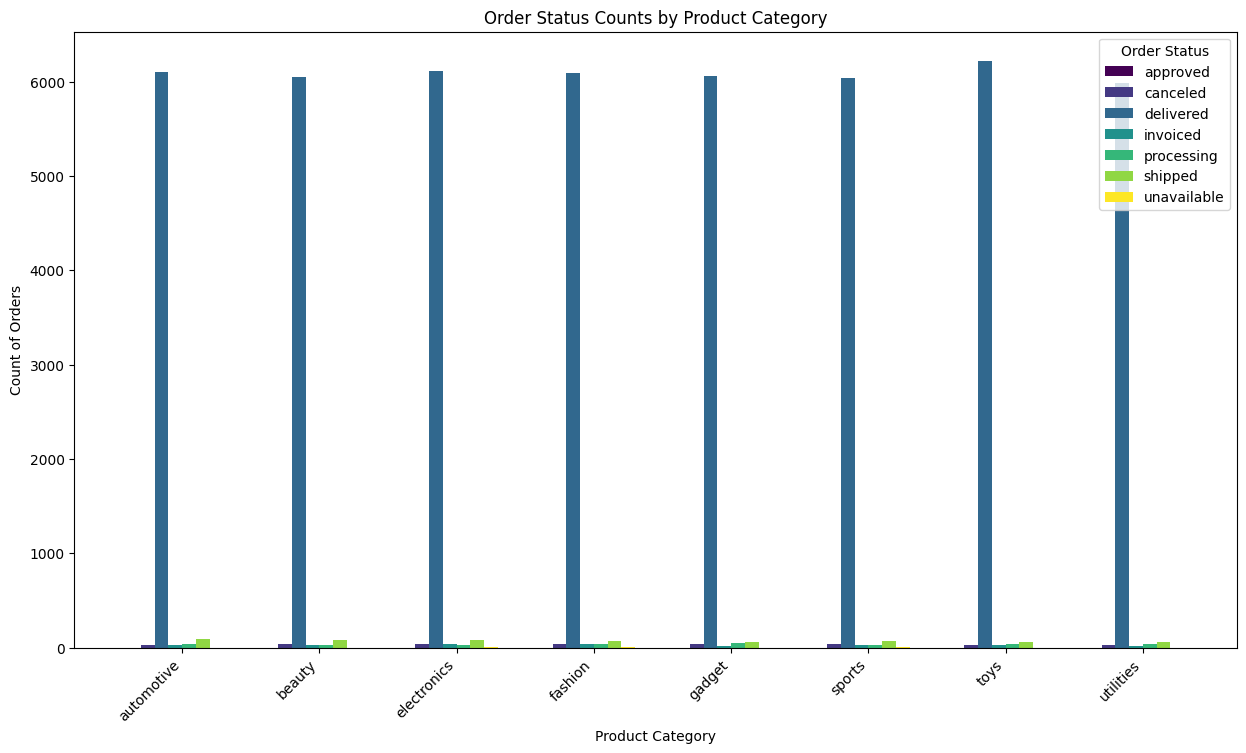

In [21]:
# Assuming order_status_pivot is already created with product_category_name as index and order statuses as columns
# Reset the index to get product_category_name as a column
order_status_pivot = order_status_pivot.reset_index()

# Get unique order statuses
order_statuses = order_status_pivot.columns[1:]

# Define a colormap with enough distinct colors
colors = plt.cm.viridis(np.linspace(0, 1, len(order_statuses)))

# Define the position of each group on the x-axis
x = np.arange(len(order_status_pivot['product_category_name']))

# Define the width of each bar
bar_width = 0.1

# Create the plot
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting each order status separately
for i, (order_status, color) in enumerate(zip(order_statuses, colors)):
    ax.bar(x + i * bar_width, order_status_pivot[order_status], width=bar_width, label=order_status, color=color)

# Adding labels and title
plt.xlabel('Product Category')
plt.ylabel('Count of Orders')
plt.title('Order Status Counts by Product Category')
plt.xticks(x + bar_width * (len(order_statuses) / 2), order_status_pivot['product_category_name'], rotation=45, ha='right')
plt.legend(title='Order Status')
plt.show()

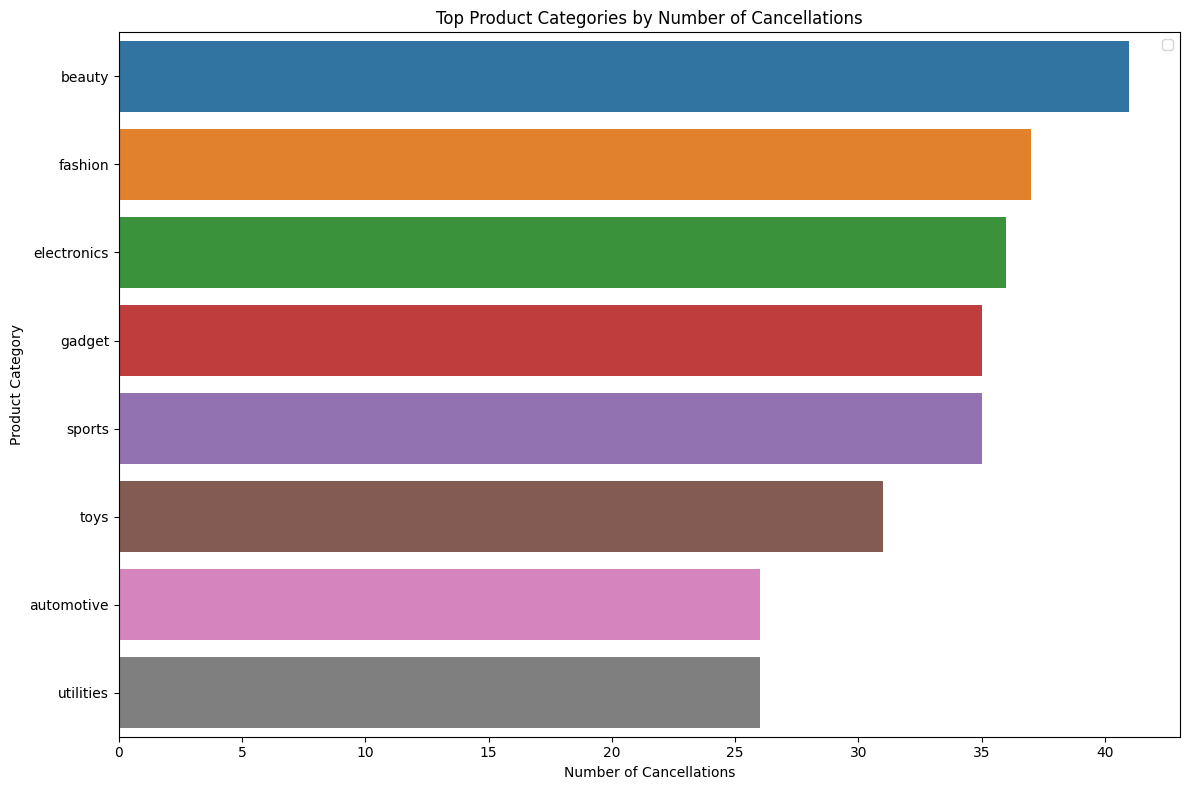

In [23]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='canceled_orders', y='product_category_name', data=canceled_category_counts.head(10), hue='product_category_name', dodge=False)
plt.xlabel('Number of Cancellations')
plt.ylabel('Product Category')
plt.title('Top Product Categories by Number of Cancellations')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Even though the products that have been delivered have the highest number, there are still products that have been canceled for purchase. And the second graph shows that the products of beauty have the highest number of cancellations.

Recomendation:
- Investigate the reason of cancelation products. Perform an analysis to understand the reasons behind the cancellations that are happening. This can involve customer surveys or direct observation to identify common patterns or issues that may exist.

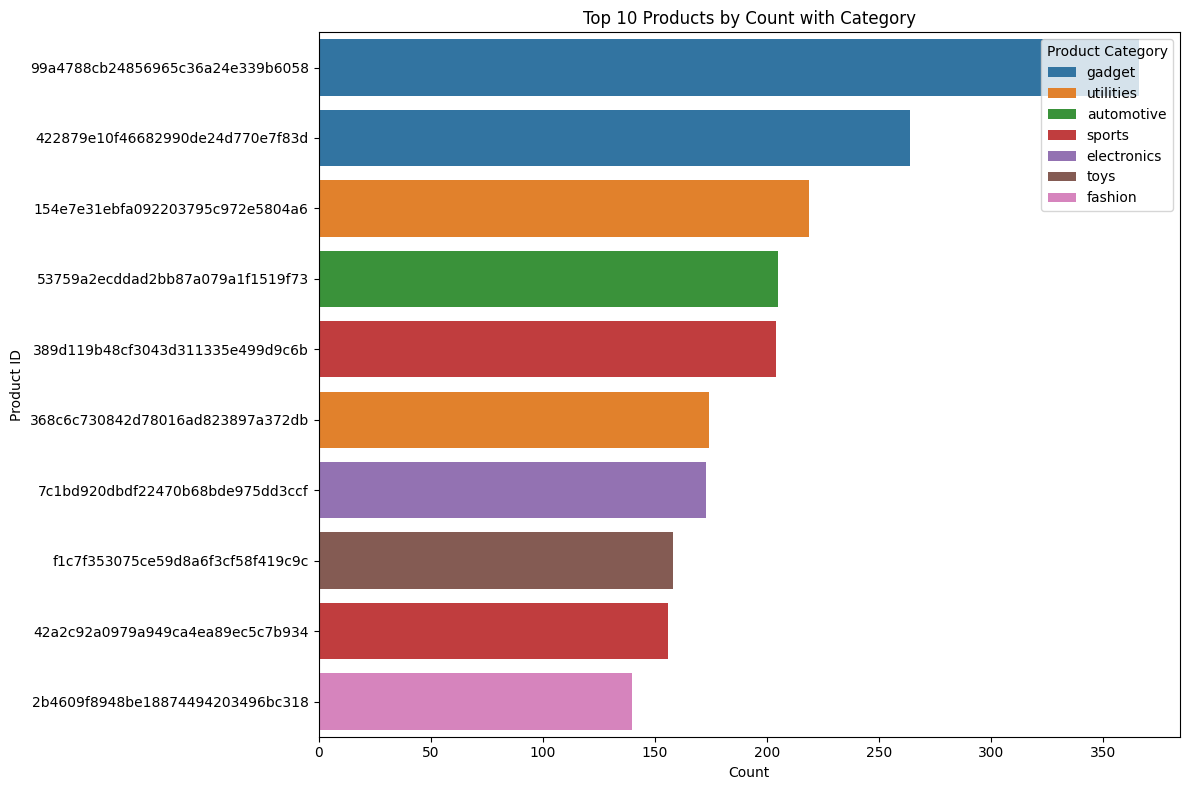

In [18]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='product_id', hue='product_category_name', data=top_products_with_category.head(10))
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Count with Category')
plt.legend(title='Product Category', loc='upper right')
plt.tight_layout()
plt.show()

From the graph, it can be seen that the numbers 1 and 2 are products in the "Gadget" category.

Recomendation:
- Ensure that products in top 10, especially the top 1 and 2 items, are always adequately stocked. This can help meet high demand and minimize the risk of lost sales due to stockouts.
- Utilize the popularity of these items by creating special promotions or offers to further boost sales. For example, bundle discounts with accessories or future purchase promotions.
- Provide excellent customer service, including technical support or assistance with usage. This can enhance customer satisfaction and build loyalty towards your brand.

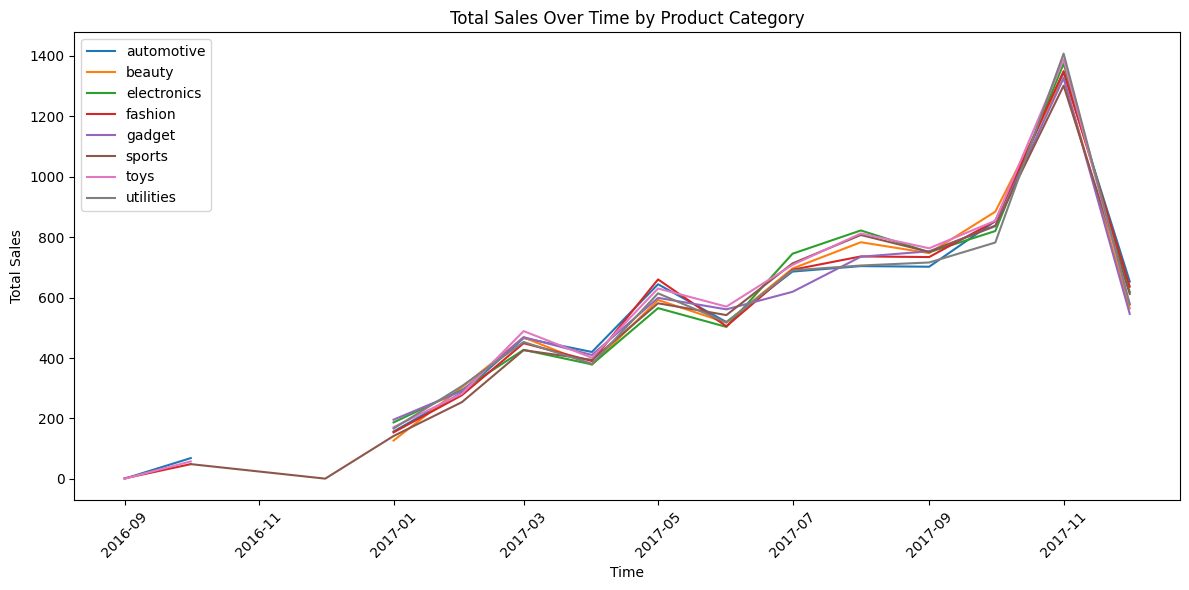

In [20]:
# Group by product category and purchase date, summing quantity (or total_sales if you prefer)
sales_over_time = df.groupby(['product_category_name', df['purchase_date'].dt.to_period('M')])['quantity'].sum().reset_index()

# Pivot the data to have product categories as columns and months as rows
sales_pivot = sales_over_time.pivot(index='purchase_date', columns='product_category_name', values='quantity')

# Convert period index to timestamp
sales_pivot.index = sales_pivot.index.to_timestamp()

# Plotting each category separately
plt.figure(figsize=(12, 6))
for category in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[category], label=category)

plt.title('Total Sales Over Time by Product Category')
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph illustrates the total sales trends for every product category over time. However, there is some data missing from various categories from 2016-10 to 2017-01; this may have happened because of a data entry error.

There was a notable increase in sales during November 2017, followed by a steep decline thereafter.

Recomendation:
- It's crucial to rectify any data entry errors that may have caused missing data in various categories from October 2016 to January 2017. Ensuring accurate and complete data is essential for reliable analysis and decision-making.
- Given the notable increase in sales in November 2017 followed by a sharp decline, conduct a thorough analysis to understand the factors contributing to these fluctuations. This analysis can help identify seasonal patterns, consumer behavior changes, or other factors impacting sales.